In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

%matplotlib inline

<div class="alert alert-info" role="alert">
    <h1>DATA IMPORT</h1>
</div>

In [2]:
path='https://raw.githubusercontent.com/MatteoGandetto/Corso_ML_con_Python/master/Regressione_Lineare_Multipla_IN.csv'
INPUT_df = pd.read_csv(path)

In [3]:
INPUT_df.head()

,Superficie,Vani,Prezzo
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


In [4]:
INPUT_df.shape

(104, 3)

In [5]:
# remove nan values

INPUT_df = INPUT_df.dropna(1, "all") #remove rows
INPUT_df = INPUT_df.dropna(0, "all") #remove columns

In [6]:
# convert to numpy arrays

np_IN = np.array(INPUT_df)

In [7]:
# split into features and target columns

np_IN_X = np_IN[:,0:2]
np_IN_y = np_IN[:,2]

In [8]:
np_IN_X.shape

(104, 2)

In [9]:
np_IN_y.shape

(104,)

<div class="alert alert-info" role="alert">
    <h1>DATA PREPROCESSING</h1>
</div>

In [10]:
# split dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np_IN_X,np_IN_y,test_size=0.25)

- Normalizzazione: portiamo tutti i dati in un range compreso tra 0 e 1
- Standardizzazione: convertiamo i dati in una distribuzione normale con media 0 e deviazione standard 1.

In [11]:
# standardize

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)
X_all=ss.transform(np_IN_X)

Useful links
- https://datascience.stackexchange.com/questions/12321/whats-the-difference-between-fit-and-fit-transform-in-scikit-learn-models
- https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

<div class="alert alert-info" role="alert">
    <h1>ML MODEL</h1>
</div>

### Training process

In [12]:
# train linear regressor

from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression().fit(X_train_ss, y_train)
print("Coefficiente angolare stimato", linear_reg.coef_)
print("Intercetta stimata", linear_reg.intercept_)

Coefficiente angolare stimato [137017.26490461  38292.36218351]
Intercetta stimata 258610.20512820513


### Prediction process

In [13]:
# predict using fitted model

y_pred_test = linear_reg.predict(X_test_ss)
y_pred_train = linear_reg.predict(X_train_ss)
y_pred_all = linear_reg.predict(X_all)

<div class="alert alert-info" role="alert">
    <h1>METRICS EVALUATION</h1>
</div>

In [14]:
#evaluate the model by using R2=1-RSE and MSE

from sklearn.metrics import mean_squared_error

R2_test = linear_reg.score(X_test_ss,y_test)
MSE_test = mean_squared_error( y_test,y_pred_test)

R2_train=linear_reg.score(X_train_ss,y_train)
MSE_train = mean_squared_error(y_train,y_pred_train)

print ('TEST\nR^2=',R2_test,'\nMSE= %f \n' % MSE_test)
print ('TRAIN\nR^2=',R2_train,'\nMSE= %f \n' % MSE_train)

TEST
R^2= 0.6015470519013126 
MSE= 2028875697.575854 

TRAIN
R^2= 0.8348865615537988 
MSE= 2547418885.463046 



<div class="alert alert-info" role="alert">
    <h1>PLOT RESULTS</h1>
</div>

In [15]:
# Scale back the data to the original representation with inverse transformation

X_train_new=ss.inverse_transform(X_train_ss)
X_test_new=ss.inverse_transform(X_test_ss)
np_IN_X_new=ss.inverse_transform(X_all)

C:\Users\ricca\anaconda3\envs\Machine_learning\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


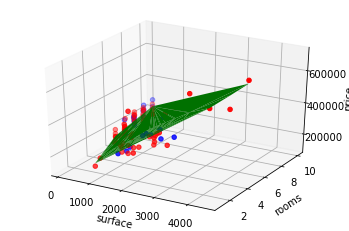

In [16]:
# plot regression plane

fig = plt.figure() 
axs = fig.add_subplot(111, projection='3d') 

axs.locator_params(axis='z', nbins=4)
axs.set_xlabel('surface')
axs.set_ylabel('rooms')
axs.set_zlabel('price')

axs.scatter(X_test_new[:,0], X_test_new[:,1], y_test, color="blue")
axs.scatter(X_train_new[:,0], X_train_new[:,1], y_train, color='red')

axs.plot_trisurf(np_IN_X_new[:,0], np_IN_X_new[:,1], y_pred_all, color='green')
fig.show()